<center>Dr. Pietro Giampa</center>

<center>TRIUMF</center>

<center>2020 Winter Term</center>

<center>Lecture 3/3</center>

# Outline
    
    1) Handling Large Datasets with Pandas
    2) Data Fitting with SciPy
    3) Interpolation with SciPy
    4) Exercises

# Handling Large Datasets with Pandas
Thus far we have only covered very simplistic cases where all the data can be stored as individual values or multi-dimensional arrays. However, sometimes datasets can be much larger and require more complex handling structures. This is exactly where the Pandas library comes into play.

Pandas is an incredible library capable of doing almost everything needed for large dataset analysis. For documentation or instructions on how to install the library go to their website: https://pandas.pydata.org/
In general, there are two types of Pandas objects:

* Series - A one-dimensional data structure that can store values, and for every value it holds a unique index, too (sounds familiar?).
* DataFrame - A two (or more) dimensional data structure. Effectively a table with rows and columns. The columns have names and the rows have indexes.

Since Series are fancier arrays, I will focus only on DataFrames in this lecture. First, as always, you need to remember to add the library into your code, like this:

In [1]:
import pandas as pd

### Loading and Printing Data Files
Pandas can take almost any data files or data list as input and convert it into a DataFrame that is easy to use (whether you are working with text files, CSV files, SQL files, and others). To import data you only need a simple line of code using a function called read_csv(). Don't let the name fool you, the function reads all the data files listed above. The read_csv() function takes several inputs, here the essentials: 

* File Path & Name: Path to the file and file name, so that Pandas can access the data (NB: Always provide the full directory if you can).
* Sep: This input parameter tells Pandas how the data is formatted inside the file (tab-edited, comma-separated, etc).
* Headers: This lets you pass an array with the name of each row. I recommend setting this to 0 (header=0).
* Names: Similarly to Headers it lets you re-name each column. I suggest to always label your columns to make your life easy later. 

For instance, here is an example by importing a text file created from the ESTAR dataset (Stopping Powers and Range Tables for Electrons). Note that the file is already loaded in the course directory.

In [2]:
file = 'Lecture3_DataFile.txt' ## Path + Name of the Data File
names = ['Energy','Collision SP','Radiative SP','Range'] ## Array containing the columns names
DataFrame = pd.read_csv(file, header=None, sep='\t', names=names) ## Import file to DataFrame

You can always display your DataFrames using the following two methods:

* print(DataFrame) - Prints the Pandas data frame according to screen space.
* DataFrame_Name - Prints the full data frame with Pandas graphics.

In [3]:
print(DataFrame) ## Standard Python printing method
DataFrame ## Uses Pandas graphics for data frame display

       Energy  Collision SP  Radiative SP      Range
0      0.0100        51.240      0.000970   0.000108
1      0.0125        42.710      0.000979   0.000161
2      0.0150        36.810      0.000988   0.000225
3      0.0175        32.490      0.000996   0.000297
4      0.0200        29.160      0.001004   0.000378
..        ...           ...           ...        ...
76   600.0000         5.553      8.821000  68.480000
77   700.0000         5.577     10.360000  75.080000
78   800.0000         5.597     11.910000  81.070000
79   900.0000         5.616     13.460000  86.540000
80  1000.0000         5.632     15.020000  91.570000

[81 rows x 4 columns]


,Energy,Collision SP,Radiative SP,Range
0,0.0100,51.240,0.000970,0.000108
1,0.0125,42.710,0.000979,0.000161
2,0.0150,36.810,0.000988,0.000225
3,0.0175,32.490,0.000996,0.000297
4,0.0200,29.160,0.001004,0.000378
...,...,...,...,...
76,600.0000,5.553,8.821000,68.480000
77,700.0000,5.577,10.360000,75.080000
78,800.0000,5.597,11.910000,81.070000
79,900.0000,5.616,13.460000,86.540000


Sometimes, it’s good not to print the whole DataFrame and fill your screen with numbers and lines. If you simply want to check that some operation worked, you can use the following commands:

* DataFrame.head() - Just prints the first 5 elements, with index and names.
* DataFrame.tail() - Just prints the last 5 elements, with index and names.
* DataFrame.sample(n) - Prints n elements, randomly picked from the DataFrame index. 

In [4]:
DataFrame.head() ## Print first 5 elements

,Energy,Collision SP,Radiative SP,Range
0,0.0100,51.24,0.000970,0.000108
1,0.0125,42.71,0.000979,0.000161
2,0.0150,36.81,0.000988,0.000225
3,0.0175,32.49,0.000996,0.000297
4,0.0200,29.16,0.001004,0.000378


In [5]:
DataFrame.tail() ## Print the last 5 elements

,Energy,Collision SP,Radiative SP,Range
76,600.0,5.553,8.821,68.48
77,700.0,5.577,10.360,75.08
78,800.0,5.597,11.910,81.07
79,900.0,5.616,13.460,86.54
80,1000.0,5.632,15.020,91.57


In [6]:
DataFrame.sample(5) ## Print 5 lements, randomly selected

,Energy,Collision SP,Radiative SP,Range
36,2.00,3.823,0.01162,0.474400
15,0.09,9.367,0.00119,0.005544
69,250.00,5.417,3.49600,37.850000
58,50.00,5.090,0.59590,10.150000
63,90.00,5.238,1.15300,16.770000


Final note, before moving on to Data Frame handling, you can always access any given value in the Data Frame by simply specifying the name of the column and the index number (similar to multi-D arrays). 

In [7]:
print('Entry 74 in Energy:',DataFrame['Energy'][73]) ## Print the 74th element in the DataFrame

Entry 74 in Energy: 450.0


### Data Frame Handling
First off, you can always create new Data Frames based on an already existing Data Frame. This is particularly handy if you need to edit certain variables (or columns) for a given analysis and you don't want to modify the original data. This can be achieved by slicing the Data Frame like this:

In [8]:
NewDataFrame = DataFrame[['Range','Energy']] ## New df based on a subset of DataFrame
NewDataFrame.tail() ## Print last 5 elements

,Range,Energy
76,68.48,600.0
77,75.08,700.0
78,81.07,800.0
79,86.54,900.0
80,91.57,1000.0


Note the double brackets. The outer bracket frames tell pandas that you want to select columns, and the inner brackets are for the list of the column names. This slicing can be done with any number of columns. 

Now, say that instead of selecting given columns, you are interested only in an object inside the Data Frame that meets a certain requirement. Here how to skim through the Data Frame quickly, while searching for conditionals. For example, imagine if you want to select only energy ranges that are < than 5 MeV.

In [9]:
LowEnergyDF = DataFrame[DataFrame.Energy < 5.0] ## Vreate New DataFrame filled with entries of Energy < 5.0 MeV
LowEnergyDF.tail() ## Print the last 5 elements

,Energy,Collision SP,Radiative SP,Range
37,2.5,3.873,0.01534,0.6039
38,3.0,3.924,0.01931,0.7316
39,3.5,3.973,0.02348,0.8576
40,4.0,4.020,0.02782,0.9819
41,4.5,4.063,0.03230,1.1050


Pandas have a series of very simple one-line-commands that will let do basic operation on an individual or multiple columns at the same time. Here the command list:

* count() - Returns the number of rows in each columns 
* sum() - Returns the sum of all entries in a given column(s). (NB: Thinks get funky if you use this for non-numbers).
* min() - Returns the smallest value in the selected column(s).
* max() - Returns the maximum value in a given column(s).
* mean() - Returns the mean of the selected column(s).

NB: all commands can be used for a series of columns or individually.

In [10]:
print('Number of Entries in Energy:',DataFrame.Energy.count()) ## Print the entries in Energy
print('Sum of All Ranges:',DataFrame['Range'].sum()) ## Print sum of all entries in Range
print('Minimum Collision Stopping Power:',DataFrame['Collision SP'].min()) ## Print the minimum value in Collision Stopping Power
print('Minimum Radiative Stopping Power:',DataFrame['Radiative SP'].max()) ## Print the minimum value in Radiative Stopping Power
print('Minimum Collision Stopping Power:',DataFrame.Range.mean()) ## Print the minimum value in Collision Stopping Power

Number of Entries in Energy: 81
Sum of All Ranges: 1044.3855251999998
Minimum Collision Stopping Power: 3.787
Minimum Radiative Stopping Power: 15.02
Minimum Collision Stopping Power: 12.893648459259257


Basic operations between columns can also be executed and stored in a new column that gets added at the end of the Data Frame. Any kind of Python native operation can be done here (+, -, *, %, etc).

In [11]:
DataFrame['RangeTimesColl'] = DataFrame['Range']*DataFrame['Collision SP'] ## Create new column 
DataFrame.head() ## Print the top of the Data Frame

,Energy,Collision SP,Radiative SP,Range,RangeTimesColl
0,0.0100,51.24,0.000970,0.000108,0.005513
1,0.0125,42.71,0.000979,0.000161,0.006889
2,0.0150,36.81,0.000988,0.000225,0.008264
3,0.0175,32.49,0.000996,0.000297,0.009650
4,0.0200,29.16,0.001004,0.000378,0.011031


### Data Frame Sorting
One of the most useful functionalities of Pandas is the ability to sort any dataset based on a given category (or column). You can even make a combination of sorting (based on 2 or more columns). The command to sort a Data Frame is sort_values(). Note that the default is to sort in descending (or alphabetical) order, but descending order can also be requested (ascending = False).

In [12]:
DataFrame.sort_values(by=['Collision SP']) ## Sort the Data Frame based on Collision SP

,Energy,Collision SP,Radiative SP,Range,RangeTimesColl
33,1.2500,3.787,0.006614,0.277400,1.050514
34,1.5000,3.788,0.008190,0.343300,1.300420
35,1.7500,3.802,0.009862,0.409000,1.555018
32,1.0000,3.815,0.005152,0.211700,0.807635
36,2.0000,3.823,0.011620,0.474400,1.813631
...,...,...,...,...,...
4,0.0200,29.160,0.001004,0.000378,0.011031
3,0.0175,32.490,0.000996,0.000297,0.009650
2,0.0150,36.810,0.000988,0.000225,0.008264
1,0.0125,42.710,0.000979,0.000161,0.006889


In [13]:
DataFrame.sort_values(by=['Collision SP'], ascending = False) ## Sort the Data Frame based on Collision SP

,Energy,Collision SP,Radiative SP,Range,RangeTimesColl
0,0.0100,51.240,0.000970,0.000108,0.005513
1,0.0125,42.710,0.000979,0.000161,0.006889
2,0.0150,36.810,0.000988,0.000225,0.008264
3,0.0175,32.490,0.000996,0.000297,0.009650
4,0.0200,29.160,0.001004,0.000378,0.011031
...,...,...,...,...,...
36,2.0000,3.823,0.011620,0.474400,1.813631
32,1.0000,3.815,0.005152,0.211700,0.807635
35,1.7500,3.802,0.009862,0.409000,1.555018
34,1.5000,3.788,0.008190,0.343300,1.300420


As you can see from the example above, even after sorting the index is kept as the original ordering. If you want to reset the index to match the new order you need the function .reset_index(). Note, that this will automatically generate a new column, placed at the beginning, containing the original index.

In [14]:
DataFrame.sort_values(by=['Collision SP']).reset_index() ## Reset Index Based on Last Ordering

,index,Energy,Collision SP,Radiative SP,Range,RangeTimesColl
0,33,1.2500,3.787,0.006614,0.277400,1.050514
1,34,1.5000,3.788,0.008190,0.343300,1.300420
2,35,1.7500,3.802,0.009862,0.409000,1.555018
3,32,1.0000,3.815,0.005152,0.211700,0.807635
4,36,2.0000,3.823,0.011620,0.474400,1.813631
...,...,...,...,...,...,...
76,4,0.0200,29.160,0.001004,0.000378,0.011031
77,3,0.0175,32.490,0.000996,0.000297,0.009650
78,2,0.0150,36.810,0.000988,0.000225,0.008264
79,1,0.0125,42.710,0.000979,0.000161,0.006889


## Example 3.1.1
You are trying to measure the envelope of a certain beam at TRIUMF, and you just completed a measurement using two different detectors (DET1 and DET2). The data from your measurements are saved in Example311.txt (tab edited). The file contains 4 columns: DetectorType, X, Y, Xerr, Yerr (all data in units of [mm]). Load the data into a Pandas data frame. Then do the following:

* Print the first 5 elements, the last 5 elements and 5 random elements on the screen.
* Create a new Data Frame selecting only entries for DET1.
* Find the min, max, and mean in X and Y.
* Add the errors together, and create a new column with the result.
* Sort based on the column generated in the last bullet point, and change the index to match the new ordering.

In [15]:
########################################################
## Example 3.1.1                                      ##
## Introduction to Scinetific Programming with Python ##
##                                                    ##
## Pietro Giampa, TRIUMF, 2020                        ##
########################################################

### Define Needed Libraries ###
import pandas as pd

### Import Data from File ###
Filename = 'Example311.txt'
names = ['DetectorType','X','Y','Xerr','Yerr'] 
DF = pd.read_csv(Filename,header=None,sep='\t',names=names) ## Import Data

### Print the first 5 elements, the last 5 elements and 5 random elements ###
DF.head() ## First 5 elements
DF.tail() ## Last 5 elements
DF.sample(5) ## 5 random elements

### Create a new Data Frame selecting only entries for DET1 ###
DF_DET1 = DF[DF.DetectorType == 'DET1']
DF_DET1 = DF_DET1.reset_index() ## Reset the index due to slicing

### Find the min, max, and mean in X and Y ###
X_min = DF_DET1['X'].min()
X_max = DF_DET1['X'].max()
X_mean = DF_DET1['X'].mean()
Y_min = DF_DET1['Y'].min()
Y_max = DF_DET1['Y'].max()
Y_mean = DF_DET1['Y'].mean()
print('X min:',X_min,'X max:',X_max,'X mean:',X_mean)
print('Y min:',Y_min,'Y max:',Y_max,'Y mean:',Y_mean)

### Add the errors in quadrature, and create a new column with the resul ###
DF_DET1['Error Tot'] = DF_DET1['Xerr']+DF_DET1['Yerr']

### Sort based on the column generated in the last bullet point, and change the index to match the new ordering ###
DF_DET1.sort_values(by=['Error Tot']).reset_index().head()

X min: 0.0 X max: 15.0 X mean: 7.0
Y min: 0.0 Y max: 30.0 Y mean: 13.88888888888889


,level_0,index,DetectorType,X,Y,Xerr,Yerr,Error Tot
0,11,19,DET1,4.0,15.0,0.13,0.43,0.56
1,14,26,DET1,2.0,17.0,0.57,0.11,0.68
2,19,35,DET1,6.0,0.0,0.28,0.41,0.69
3,21,39,DET1,4.0,21.0,0.01,0.78,0.79
4,13,25,DET1,15.0,11.0,0.10,0.91,1.01


# Data Fitting With SciPy
Data fitting is one of the most useful toolsets for data analysis, it's the ultimate test between data and prediction. In Python, there are different options for data fitting. However, in this course, we will only review a method from the SciPy library called curve_fit. This is the most versatile fitting tool and adequate for all scientific levels.

Cureve_fit requires a fitting function, a dataset input and a series of optional parameters. Here the most common and useful input parameters:

* ydata - can be used to weight the fed dataset.
* p0 - Prior for floating parameters, this must be input as an array.
* bounds - Set limits on parameters floats.
* method - Allows you to change the minimization method.

Moreover, the cureve_fit function returns two arrays:

* popt - Optimal values for the parameters so that the sum of the squared residuals off(xdata, *popt) - ydata is minimized
* pcov - The estimated covariance of popt. The diagonals provide the variance of the parameter estimate. To compute one standard deviation errors on the parameters use perr = np.sqrt(np.diag(pcov)). How the sigma parameter affects the estimated covariance depends on absolute_sigma argument, as described above.

Remember that to run curve_fit you need to import the following library in your code:

In [16]:
from scipy.optimize import curve_fit

### Example 3.2.1
Create a Gaussian function that receives as input parameters, $A$, $\mu$, $\sigma$. Your code should then generate 100 random numbers distributed following a Gaussian distribution with A=100.0, $\mu$=55.0, $\sigma$=32.5. Finally, fit the generated data with a gaussian fit. Print the extracted parameters on the screen next to the input parameters. Lastly. plot the data and the fit on a Canvas (include all labels).

Recall: Gaussian distribution:

$f(x) = A \cdot e^{\frac{-(x-\mu)^{2}}{\sigma}}$

In [17]:
########################################################
## Example 3.2.1                                      ##
## Introduction to Scinetific Programming with Python ##
##                                                    ##
## Pietro Giampa, TRIUMF, 2020                        ##
########################################################

### Define Needed Libraries ###
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

### Define Gaussian Function ###
def GaussFunc(x, A, mu, sig):
    Gauss = A * np.exp(-(x-mu)**2/sig)
    return Gauss

### Define Variabes ###
A = 100.0
mu = 55.0
sig = 32.5

### Generate Random Gaussian Numbers ###
xdata = np.arange(100)
ydata = GaussFunc(np.arange(100),A,mu,sig)

### Fit Gaussian Function ###
popt, pcov = curve_fit(GaussFunc, xdata, ydata, p0=[99.,50.,12.])

### Print Results on Screen ###
print('A Prior:',A,' | A Posterior:', popt[0])
print('mu Prior:',mu,' | mu Posterior:', popt[1])
print('sig Prior:',sig,' | sig Posterior:', popt[2])

### Plot Result Fitting ###
plt.plot(xdata, ydata,'o',label='Data')
plt.plot(xdata, GaussFunc(xdata, *popt),'r-',label='Fit')
plt.title('Exercise 3.2.1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

A Prior: 100.0  | A Posterior: 100.0
mu Prior: 55.0  | mu Posterior: 55.0
sig Prior: 32.5  | sig Posterior: 32.5


<Figure size 640x480 with 1 Axes>

# Interpolation With SciPy
The interpolator is an essential data analysis tool. Interpolation is a convenient method to create a function based on fixed data points, which can be evaluated anywhere within the domain defined by the given data using linear interpolation. An instance of this class is created by passing the 1-D vectors comprising the data.

SciPy has a great option for interpolator, more precisely the interp1d function. This enables the user to perform interpolation on any combination of two arrays (or data). Note that SciPy also offers multi-dimensional interpolators, but those are beyond the scope of this course. 

interp1d requires two input arrays (x and y data), with an option for some extra parameters. For example, you can use the parameter 'kind' to set the interpolator in liner, cubic or nearest mode.

To use the interp1d function you first have to import it from the SciPy library:

In [18]:
from scipy.interpolate import interp1d

### Example 3.3.1
Generate 50 random data points, distributed following a sin function. Interpolate the generated data using both the liner and spline method and plot the results to show any differences (include all labels). 

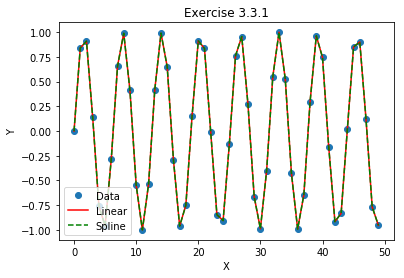

In [19]:
########################################################
## Example 3.3.1                                      ##
## Introduction to Scinetific Programming with Python ##
##                                                    ##
## Pietro Giampa, TRIUMF, 2020                        ##
########################################################

### Define Needed Libraries ###
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

### Define Gaussian Function ###
def SinFunc(x):
    return np.sin(x)

### Generate data using SinFunc ###
xdata = np.arange(50)
ydata = SinFunc(np.arange(50))

### Interpolate the Data ###
Data_Itrp_lin = interp1d(xdata, ydata)
Data_Itrp_spl = interp1d(xdata, ydata, kind='cubic')

### Plot Results ###
plt.plot(xdata,ydata,'o',label='Data')
plt.plot(xdata,Data_Itrp_lin(xdata),'r-',label='Linear')
plt.plot(xdata,Data_Itrp_spl(xdata),'g--',label='Spline')
plt.title('Exercise 3.3.1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Exercises

#### Problem 1
Go on the ASTAR database (https://physics.nist.gov/PhysRefData/Star/Text/ASTAR.html) and download a table composed of Energy, Collision Stopping Power and Range, for alpha ions in argon (save the table in .txt or .csv file). Import the data into a Pandas Data Frame and remove all the entries with energy below 10 MeV. Add two new columns one filled the value for the liquid argon density and one for the solid argon density. Calculate the range in cm for both the liquid and solid cases and add them as separate columns. Reorder everything in descending order based on the range in cm of solid argon. Print 3 random entry from the final Data Frame, and plot Range (in cm) vs Energy for both the liquid and solid-state on the same canvas (use appropriate labels). Finally, interpolate the Collision Stopping Power and plot the new object as a function of Range in g/cm2.

#### Problem 2
You are taking gamma spectroscopy measurements, to estimate the potassium activity in a given sample. Before taking data you have to perform an energy calibration on the Germanium detector. After running the calibration software the program returns the values below. Import the data below into a Pandas Data Frame. Construct two functions (linear and quadratic) to fit the data. Plot your results (with appropriate labels). Use the fit results to conclude which one is the best fit, print your findings on the screen. 

* Counts [%] - Energy [MeV]
* 12.5    -    0.0
* 20.4    -    1.0
* 42.5    -    2.0
* 78.8    -    3.0
* 129.3   -    4.0
* 194.0   -    5.0
* 272.9   -    6.0
* 366.0   -    7.0
* 473.3   -    8.0
* 594.8   -    9.0
* 730.5   -    10.0
* 880.4   -    11.0
* 1044.5  -    12.0
* 1222.8  -    13.0
* 1415.3  -    14.0
* 1622.0  -    15.0
* 1842.9  -    16.0
* 2078.0  -    17.0
* 2327.3  -    18.0
* 2590.8  -    19.0